In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv('Abalone.csv')
df.head(8)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16


Here in above DataFrame, Rings is the target variable.

In [61]:
df.shape

(4177, 9)

In [62]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

As we can see, all input column variables are float type except Sex, so we need to encode it to integer type.

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [64]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [65]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

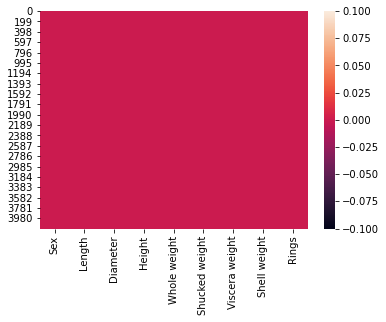

In [66]:
sns.heatmap(df.isnull())

As we can see that no null value is present in the data, so we can go ahead.

In [67]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [68]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

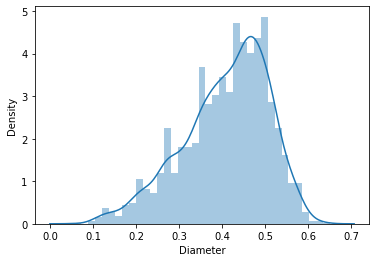

In [69]:
sns.distplot(df['Diameter'])

Diameter is not normalised, little bit left skewed

<AxesSubplot:xlabel='Length', ylabel='Density'>

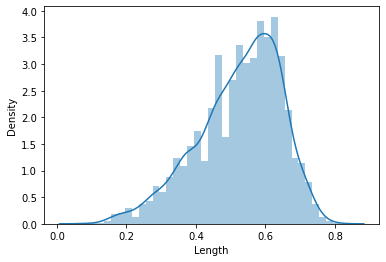

In [70]:
sns.distplot(df['Length'])

Length is not normalised, it is left skewed

<AxesSubplot:xlabel='Height', ylabel='Density'>

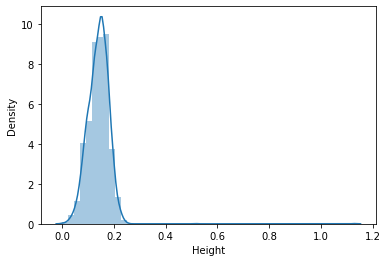

In [71]:
sns.distplot(df['Height'])

In height it is ok, just littlebit data is outside the curve.

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

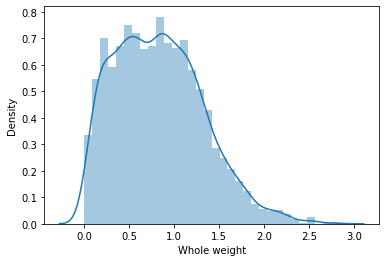

In [72]:
sns.distplot(df['Whole weight'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

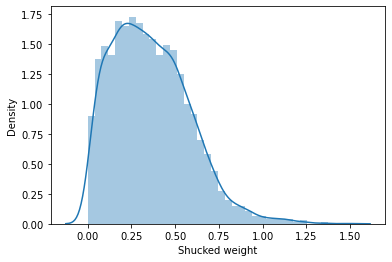

In [73]:
sns.distplot(df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

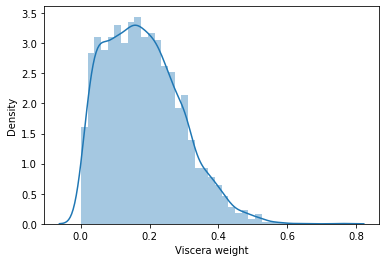

In [74]:
sns.distplot(df['Viscera weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

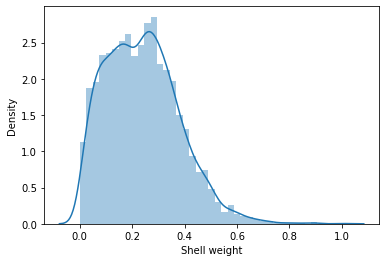

In [75]:
sns.distplot(df['Shell weight'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

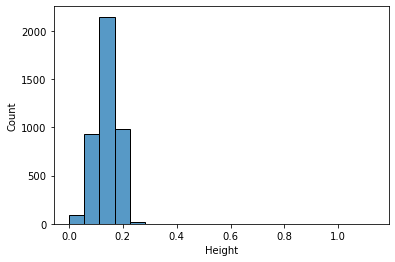

In [76]:
sns.histplot(df['Height'],bins=20)

<AxesSubplot:xlabel='Diameter', ylabel='Count'>

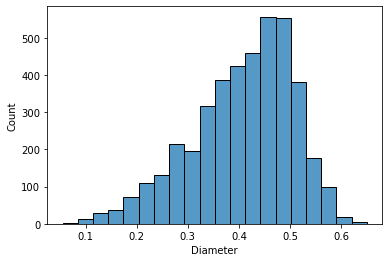

In [77]:
sns.histplot(df['Diameter'],bins=20)

<AxesSubplot:xlabel='Whole weight', ylabel='Count'>

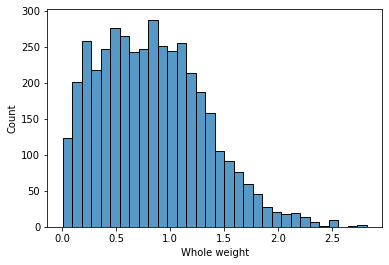

In [78]:
sns.histplot(df['Whole weight'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Count'>

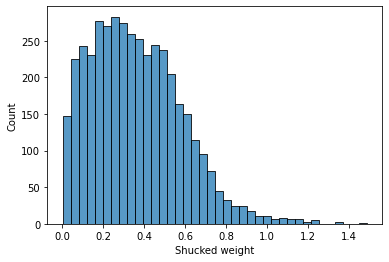

In [79]:
sns.histplot(df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Count'>

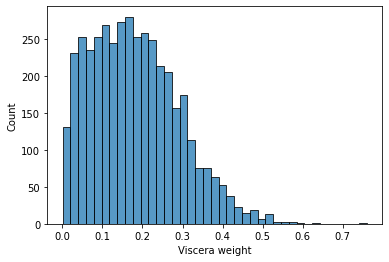

In [80]:
sns.histplot(df['Viscera weight'])

In [81]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Here from above we can see that there is lot of right and left skewed data, therefore we will use log and squarerrot technique to remove skewness. 

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [83]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In columns Whole weight,Shucked weight and Viscera weight mean is greater than median, therefore outliers may present.
High SD is present in sex, whole weight and shucked weight therefore skewness is present.
High IQR value in height, length, whole weight, viscera and shell. Hence outliers are present.

Sex                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Length            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Height               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Whole weight      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Shucked weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Viscera weight          AxesSubplot(0.125,0.125;0.227941x0.222059)
Shell weight         AxesSubplot(0.398529,0.125;0.227941x0.222059)
Rings                AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

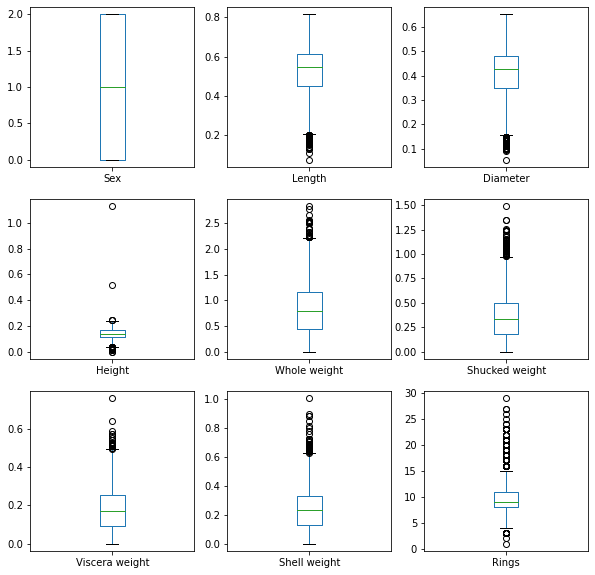

In [85]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

From the boxplot above we can see many outliers are present in the columns, we will use z score to remove it.

In [84]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

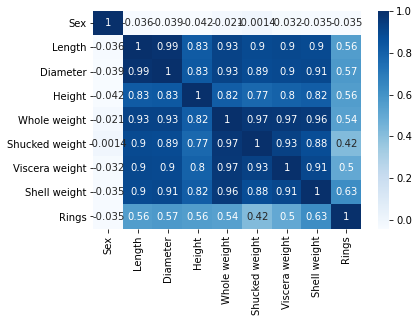

In [86]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

From the above correlation map, we can see that length and diameter are highly correlated with each other and also contributing to the y output (rings).
Similarly whole weight and Shucked weight is highly contributing to the y output (rings).
Moreover we will see it using VIF, that multicollinearity is present or not.

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
x=df.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [93]:
x.shape

(4177, 8)

In [94]:
x.shape[1]

8

In [95]:
y=df.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [96]:
def vif_calc():
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [97]:
vif_calc()

         features  VIF Factor
0             Sex    2.555356
1          Length  700.488988
2        Diameter  749.121626
3          Height   42.128924
4    Whole weight  421.652484
5  Shucked weight  101.674946
6  Viscera weight   63.585627
7    Shell weight   81.873737


From VIF factor we can clearly see that there is multicollinearity b/w Length and Diameter.So, here we will drop Length column as it is contributing less than Diameter if compared.
Also there is multicollinearity b/w Whole weight and Shucked weight. So, here we will drop shucked weight as it is contributing less than whole weight if compared.

In [98]:
df.drop(['Length','Shucked weight'],axis=1,inplace=True)

In [100]:
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [101]:
x=df.iloc[:,:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [102]:
x.shape

(4177, 6)

In [103]:
y=df.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [104]:
vif_calc()

         features  VIF Factor
0             Sex    2.532536
1        Diameter   46.978990
2          Height   41.650431
3    Whole weight  123.993316
4  Viscera weight   59.292682
5    Shell weight   49.403495


In [106]:
import matplotlib.pyplot as plt

<AxesSubplot:>

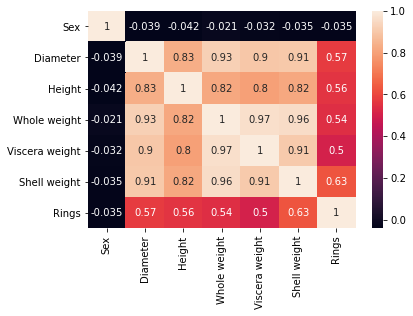

In [105]:
sns.heatmap(df.corr(),annot=True)

# Removing Outliers uning Zscore

In [107]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[1.15198011, 0.43214879, 1.06442415, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.439929  , 1.18397831, ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.12213032, 0.10799087, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.67640943, 1.56576738, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.77718745, 0.25067161, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.48263359, 1.32665906, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [108]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  237,  238,  270,  275,
        277,  278,  294,  310,  313,  314,  334,  351,  355,  358,  358,
        362,  375,  416,  417,  428,  431,  433,  469,  478,  480,  501,
        526,  530,  572,  628,  673,  674,  675,  678,  694,  696,  719,
        720,  744,  754,  756,  811,  891,  891, 1048, 1051, 1052, 1204,
       1206, 1207, 1207, 1207, 1209, 1257, 1417, 1422, 1427, 1427, 1428,
       1429, 1757, 1759, 1762, 1762, 1763, 1763, 1987, 2051, 2090, 2108,
       2108, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209, 2274,
       2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2436, 2459,
       2471, 2623, 2624, 2624, 2709, 2710, 2810, 2811, 2811, 2863, 2863,
       3008, 3140, 3148, 3149, 3149, 3151, 3151, 3188, 3193, 3280, 3359,
       3427, 3427, 3599, 3628, 3715, 3715, 3715, 3800, 3837, 3899, 3924,
       3930, 3944, 3996, 4145, 4148]), array([6, 6

In [109]:
df_new=df[(z<3).all(axis=1)]

In [110]:
df_new.head()

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.150,15
1,2,0.265,0.090,0.2255,0.0485,0.070,7
2,0,0.420,0.135,0.6770,0.1415,0.210,9
3,2,0.365,0.125,0.5160,0.1140,0.155,10
4,1,0.255,0.080,0.2050,0.0395,0.055,7


In [111]:
df.shape

(4177, 7)

In [112]:
df_new.shape

(4050, 7)

In [113]:
loss_percentage=(4177-4050)/4177*100
print(loss_percentage)

3.040459660043093


As we have checked that after removing outliers using z score our data loss percentage is around 3 % which is ok.

In [114]:
df=df_new

In [115]:
x=df.iloc[:,0:-1]
x.head()

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.150
1,2,0.265,0.090,0.2255,0.0485,0.070
2,0,0.420,0.135,0.6770,0.1415,0.210
3,2,0.365,0.125,0.5160,0.1140,0.155
4,1,0.255,0.080,0.2050,0.0395,0.055


In [116]:
y=df.iloc[:,-1]
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

# Removing Skewness

In [117]:
df.skew()

Sex              -0.098078
Diameter         -0.598478
Height           -0.248237
Whole weight      0.388193
Viscera weight    0.455795
Shell weight      0.365540
Rings             0.716011
dtype: float64

Skewness threshold is taken as +/- 0.40

Now we are using Power tranform with Yeo Johnson method to remove skewness 

In [118]:
from sklearn.preprocessing import power_transform

In [119]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.13209907, -0.54366768, -1.15446742, -0.57218707, -0.68845959,
        -0.58721088],
       [ 1.13209907, -1.39666928, -1.27487029, -1.35199415, -1.33071705,
        -1.33033088],
       [-1.31367161,  0.03164741, -0.13303536, -0.18447783, -0.24367518,
        -0.08466313],
       ...,
       [ 1.13209907,  0.69279266,  1.91986465,  0.83530885,  1.07198704,
         0.65177873],
       [-1.31367161,  0.82290733,  0.27758733,  0.68292035,  0.86169235,
         0.56665691],
       [ 1.13209907,  1.82604985,  1.60478049,  2.08531022,  1.70407814,
         1.82746448]])

# Scaling of the data

Now we will use scaling technique (StandardScaler and MinMaxScaler) to transform the features to the same scale.

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [121]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.13209907, -0.54366768, -1.15446742, -0.57218707, -0.68845959,
        -0.58721088],
       [ 1.13209907, -1.39666928, -1.27487029, -1.35199415, -1.33071705,
        -1.33033088],
       [-1.31367161,  0.03164741, -0.13303536, -0.18447783, -0.24367518,
        -0.08466313],
       ...,
       [ 1.13209907,  0.69279266,  1.91986465,  0.83530885,  1.07198704,
         0.65177873],
       [-1.31367161,  0.82290733,  0.27758733,  0.68292035,  0.86169235,
         0.56665691],
       [ 1.13209907,  1.82604985,  1.60478049,  2.08531022,  1.70407814,
         1.82746448]])

In [122]:
mms=MinMaxScaler()
x=mms.fit_transform(x)
x

array([[1.        , 0.35410083, 0.27558242, 0.31888598, 0.29794752,
        0.3046488 ],
       [1.        , 0.18153751, 0.25657035, 0.14770334, 0.1513442 ,
        0.1451612 ],
       [0.        , 0.47048781, 0.43687035, 0.40399561, 0.39947515,
        0.41250505],
       ...,
       [1.        , 0.60423835, 0.76103092, 0.62785838, 0.69979156,
        0.5705594 ],
       [0.        , 0.63056071, 0.50170921, 0.59440617, 0.65178916,
        0.55229064],
       [1.        , 0.83349773, 0.71127796, 0.9022577 , 0.84407429,
        0.82288378]])

# Regression Model Comparisons

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=90)

In [146]:
x_train.shape

(2835, 6)

In [147]:
x_test.shape

(1215, 6)

In [148]:
y_train.shape

(2835,)

In [158]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)


0.4548491950295688

In [160]:
pred=lr.predict(x_test)
print('Predicted result price:',pred)
print('actual price',y_test)

Predicted result price: [12.2624254  10.1143617   8.60793295 ...  9.0517079   8.63531718
 11.58165108]
actual price 3865    19
2594     9
1850     8
87      10
3132    10
        ..
249      7
2995     9
1323     9
1592     9
1940    11
Name: Rings, Length: 1215, dtype: int64


In [161]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [162]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.520889456297833
Mean squared error: 4.1081624750001176
Root Mean Squared Error: 2.0268602504859867


In [164]:
from sklearn.metrics import r2_score

In [168]:
lr=LinearRegression()
for i in range (0,2835):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train_lr=lr.predict(x_train)
    pred_test_lr=lr.predict(x_test)
    print(f"At random state {i},Training accuracy is:-{r2_score(y_train,pred_train_lr)}")
    print(f"At random state {i},Training accuracy is:-{r2_score(y_test,pred_test_lr)}")
    print('\n')

At random state 0,Training accuracy is:-0.4596122572591581
At random state 0,Training accuracy is:-0.4265958958238243


At random state 1,Training accuracy is:-0.45291800239769087
At random state 1,Training accuracy is:-0.45342180099344875


At random state 2,Training accuracy is:-0.45326602726862963
At random state 2,Training accuracy is:-0.44952030869934034


At random state 3,Training accuracy is:-0.4542380900417582
At random state 3,Training accuracy is:-0.4477959759057416


At random state 4,Training accuracy is:-0.4510366865539037
At random state 4,Training accuracy is:-0.45934073721535595


At random state 5,Training accuracy is:-0.4620203133719374
At random state 5,Training accuracy is:-0.4137317398546819


At random state 6,Training accuracy is:-0.4573597059346295
At random state 6,Training accuracy is:-0.43500479800789604


At random state 7,Training accuracy is:-0.45649613748706386
At random state 7,Training accuracy is:-0.4363755121799552


At random state 8,Training accura

At random state 69,Training accuracy is:-0.4571113061217261
At random state 69,Training accuracy is:-0.4376843236801622


At random state 70,Training accuracy is:-0.4547731152795288
At random state 70,Training accuracy is:-0.44553342730781476


At random state 71,Training accuracy is:-0.4552234967829435
At random state 71,Training accuracy is:-0.44153373896973547


At random state 72,Training accuracy is:-0.44719929500048905
At random state 72,Training accuracy is:-0.4762076352524168


At random state 73,Training accuracy is:-0.45777907608136414
At random state 73,Training accuracy is:-0.43269332122009174


At random state 74,Training accuracy is:-0.4525026982742474
At random state 74,Training accuracy is:-0.45469481823661173


At random state 75,Training accuracy is:-0.4519687433378804
At random state 75,Training accuracy is:-0.45684644218640513


At random state 76,Training accuracy is:-0.44420267966496585
At random state 76,Training accuracy is:-0.48639633796811554


At random state

At random state 147,Training accuracy is:-0.44965641998692185
At random state 147,Training accuracy is:-0.46529276496504557


At random state 148,Training accuracy is:-0.44727810861374684
At random state 148,Training accuracy is:-0.47478974009691877


At random state 149,Training accuracy is:-0.4524591013488011
At random state 149,Training accuracy is:-0.4545679247543687


At random state 150,Training accuracy is:-0.4548290194223543
At random state 150,Training accuracy is:-0.4454663769748266


At random state 151,Training accuracy is:-0.45534961972900867
At random state 151,Training accuracy is:-0.4433892718732678


At random state 152,Training accuracy is:-0.45289870256714637
At random state 152,Training accuracy is:-0.4527963216969574


At random state 153,Training accuracy is:-0.4541592099413735
At random state 153,Training accuracy is:-0.44717455846649423


At random state 154,Training accuracy is:-0.4537476795386801
At random state 154,Training accuracy is:-0.44836007135031564




At random state 226,Training accuracy is:-0.45433800471789865
At random state 226,Training accuracy is:-0.44790984157398517


At random state 227,Training accuracy is:-0.44461990449462563
At random state 227,Training accuracy is:-0.4808032266274658


At random state 228,Training accuracy is:-0.44428079901830664
At random state 228,Training accuracy is:-0.4882544835368168


At random state 229,Training accuracy is:-0.4539300751472072
At random state 229,Training accuracy is:-0.4484335585654211


At random state 230,Training accuracy is:-0.44399679547034065
At random state 230,Training accuracy is:-0.48698294292922006


At random state 231,Training accuracy is:-0.45283350271828804
At random state 231,Training accuracy is:-0.45010080166215705


At random state 232,Training accuracy is:-0.449105390162146
At random state 232,Training accuracy is:-0.4689570903562644


At random state 233,Training accuracy is:-0.4541712878953952
At random state 233,Training accuracy is:-0.4423782413455113


A

At random state 302,Training accuracy is:-0.4452011065485234
At random state 302,Training accuracy is:-0.47844982872567565


At random state 303,Training accuracy is:-0.4538084551587711
At random state 303,Training accuracy is:-0.44529206835561863


At random state 304,Training accuracy is:-0.46303536587150995
At random state 304,Training accuracy is:-0.4122268501699061


At random state 305,Training accuracy is:-0.45536351050075186
At random state 305,Training accuracy is:-0.4438910387420879


At random state 306,Training accuracy is:-0.45659080946135244
At random state 306,Training accuracy is:-0.435470780094775


At random state 307,Training accuracy is:-0.45447540674221
At random state 307,Training accuracy is:-0.4452981118670881


At random state 308,Training accuracy is:-0.4616826502437552
At random state 308,Training accuracy is:-0.41812357610966056


At random state 309,Training accuracy is:-0.45578956528505576
At random state 309,Training accuracy is:-0.4399678318432757


At r

At random state 382,Training accuracy is:-0.44111892357212457
At random state 382,Training accuracy is:-0.496605130005241


At random state 383,Training accuracy is:-0.4554738202654376
At random state 383,Training accuracy is:-0.44015133868185696


At random state 384,Training accuracy is:-0.4466519286934071
At random state 384,Training accuracy is:-0.4790707872940847


At random state 385,Training accuracy is:-0.4537683114139921
At random state 385,Training accuracy is:-0.4497645205704993


At random state 386,Training accuracy is:-0.4603869681070051
At random state 386,Training accuracy is:-0.4223285816568365


At random state 387,Training accuracy is:-0.4597939725780871
At random state 387,Training accuracy is:-0.4165307897268795


At random state 388,Training accuracy is:-0.44817929116657085
At random state 388,Training accuracy is:-0.4710720034738134


At random state 389,Training accuracy is:-0.44750640082202986
At random state 389,Training accuracy is:-0.47297158152040086


At r

At random state 458,Training accuracy is:-0.46321405594906395
At random state 458,Training accuracy is:-0.4089439761640691


At random state 459,Training accuracy is:-0.45737936887403585
At random state 459,Training accuracy is:-0.43478603743035027


At random state 460,Training accuracy is:-0.45576002680488736
At random state 460,Training accuracy is:-0.4408243876719543


At random state 461,Training accuracy is:-0.453275632458639
At random state 461,Training accuracy is:-0.4510620425524573


At random state 462,Training accuracy is:-0.4581412950492051
At random state 462,Training accuracy is:-0.4301134002867174


At random state 463,Training accuracy is:-0.4462916977720448
At random state 463,Training accuracy is:-0.47572851899126656


At random state 464,Training accuracy is:-0.44987803771007706
At random state 464,Training accuracy is:-0.4651197975834829


At random state 465,Training accuracy is:-0.4473414290794062
At random state 465,Training accuracy is:-0.4747845520048034


At 

At random state 538,Training accuracy is:-0.44779345356534805
At random state 538,Training accuracy is:-0.47531191035411546


At random state 539,Training accuracy is:-0.4452557289216187
At random state 539,Training accuracy is:-0.480928258181636


At random state 540,Training accuracy is:-0.47319094391384564
At random state 540,Training accuracy is:-0.3648917929527915


At random state 541,Training accuracy is:-0.45431647058044633
At random state 541,Training accuracy is:-0.4465015249115034


At random state 542,Training accuracy is:-0.460852496096145
At random state 542,Training accuracy is:-0.42014327468744417


At random state 543,Training accuracy is:-0.4504563129232393
At random state 543,Training accuracy is:-0.461373419405416


At random state 544,Training accuracy is:-0.44566258078791565
At random state 544,Training accuracy is:-0.4793522319082628


At random state 545,Training accuracy is:-0.4582367166623391
At random state 545,Training accuracy is:-0.43100117802143156


At r

At random state 618,Training accuracy is:-0.4464698607725388
At random state 618,Training accuracy is:-0.48027120019293323


At random state 619,Training accuracy is:-0.45772443920643247
At random state 619,Training accuracy is:-0.4355263499025346


At random state 620,Training accuracy is:-0.45474465001715303
At random state 620,Training accuracy is:-0.44609871653771915


At random state 621,Training accuracy is:-0.44821284283188545
At random state 621,Training accuracy is:-0.4723356156079369


At random state 622,Training accuracy is:-0.45070701308075756
At random state 622,Training accuracy is:-0.461649454959003


At random state 623,Training accuracy is:-0.4553823641024338
At random state 623,Training accuracy is:-0.4430010966476998


At random state 624,Training accuracy is:-0.46458777953303354
At random state 624,Training accuracy is:-0.40333021941344493


At random state 625,Training accuracy is:-0.4570992830293019
At random state 625,Training accuracy is:-0.43508916553850063




At random state 696,Training accuracy is:-0.45169150703940275
At random state 696,Training accuracy is:-0.4570459640647284


At random state 697,Training accuracy is:-0.465022986589018
At random state 697,Training accuracy is:-0.4009233437811851


At random state 698,Training accuracy is:-0.4656409724987267
At random state 698,Training accuracy is:-0.3986015911595088


At random state 699,Training accuracy is:-0.4433459984776277
At random state 699,Training accuracy is:-0.48440469248667184


At random state 700,Training accuracy is:-0.4476676844405134
At random state 700,Training accuracy is:-0.4734238321268729


At random state 701,Training accuracy is:-0.45538496660518435
At random state 701,Training accuracy is:-0.44333608850135375


At random state 702,Training accuracy is:-0.4568091287633228
At random state 702,Training accuracy is:-0.43594715765392644


At random state 703,Training accuracy is:-0.4566835616556112
At random state 703,Training accuracy is:-0.4369139971644317


At r

At random state 776,Training accuracy is:-0.4517568853259383
At random state 776,Training accuracy is:-0.4537756963230175


At random state 777,Training accuracy is:-0.4518120240513914
At random state 777,Training accuracy is:-0.45531243603659455


At random state 778,Training accuracy is:-0.4531242342798777
At random state 778,Training accuracy is:-0.45052887819735044


At random state 779,Training accuracy is:-0.4582614116237961
At random state 779,Training accuracy is:-0.4300116389009666


At random state 780,Training accuracy is:-0.45848901371815265
At random state 780,Training accuracy is:-0.42219960828277425


At random state 781,Training accuracy is:-0.4567968567909244
At random state 781,Training accuracy is:-0.43565530768655714


At random state 782,Training accuracy is:-0.4549687951587792
At random state 782,Training accuracy is:-0.44562346868506064


At random state 783,Training accuracy is:-0.44948294068450967
At random state 783,Training accuracy is:-0.4644931035415417


A

At random state 855,Training accuracy is:-0.4569489103359071
At random state 855,Training accuracy is:-0.43579097698117797


At random state 856,Training accuracy is:-0.4505210095987099
At random state 856,Training accuracy is:-0.4608897664081949


At random state 857,Training accuracy is:-0.44079220004283437
At random state 857,Training accuracy is:-0.5010082422786568


At random state 858,Training accuracy is:-0.46040067965900755
At random state 858,Training accuracy is:-0.4250540905728367


At random state 859,Training accuracy is:-0.4508683978345873
At random state 859,Training accuracy is:-0.4586378391598529


At random state 860,Training accuracy is:-0.460432460043219
At random state 860,Training accuracy is:-0.4231301405613006


At random state 861,Training accuracy is:-0.4594110181006753
At random state 861,Training accuracy is:-0.42480413581380916


At random state 862,Training accuracy is:-0.4544958683691843
At random state 862,Training accuracy is:-0.4451107454777491


At ra

At random state 935,Training accuracy is:-0.4653321932029705
At random state 935,Training accuracy is:-0.40377919924837735


At random state 936,Training accuracy is:-0.44836331212715264
At random state 936,Training accuracy is:-0.46788187855457397


At random state 937,Training accuracy is:-0.4511133879412834
At random state 937,Training accuracy is:-0.457237300747776


At random state 938,Training accuracy is:-0.44995339375611765
At random state 938,Training accuracy is:-0.46617791794742036


At random state 939,Training accuracy is:-0.45998912965653116
At random state 939,Training accuracy is:-0.4202354994265145


At random state 940,Training accuracy is:-0.43739818535282815
At random state 940,Training accuracy is:-0.5116268892182657


At random state 941,Training accuracy is:-0.4553931540764361
At random state 941,Training accuracy is:-0.44172696218155183


At random state 942,Training accuracy is:-0.45404880241872636
At random state 942,Training accuracy is:-0.44839991382786726



At random state 1015,Training accuracy is:-0.4517671847178265
At random state 1015,Training accuracy is:-0.4539275105033985


At random state 1016,Training accuracy is:-0.4445616592018422
At random state 1016,Training accuracy is:-0.48449944433501624


At random state 1017,Training accuracy is:-0.46023267978762095
At random state 1017,Training accuracy is:-0.41886464681209457


At random state 1018,Training accuracy is:-0.4550811129252905
At random state 1018,Training accuracy is:-0.4429151384758163


At random state 1019,Training accuracy is:-0.443929275522326
At random state 1019,Training accuracy is:-0.4820420561191603


At random state 1020,Training accuracy is:-0.44493368482164
At random state 1020,Training accuracy is:-0.48576883656699044


At random state 1021,Training accuracy is:-0.45542684913903
At random state 1021,Training accuracy is:-0.44043915910540277


At random state 1022,Training accuracy is:-0.4507174380172294
At random state 1022,Training accuracy is:-0.46132235009

At random state 1094,Training accuracy is:-0.44567316283881686
At random state 1094,Training accuracy is:-0.479941305879486


At random state 1095,Training accuracy is:-0.4455332007017069
At random state 1095,Training accuracy is:-0.48053977364036604


At random state 1096,Training accuracy is:-0.4525399255565141
At random state 1096,Training accuracy is:-0.4543517354491765


At random state 1097,Training accuracy is:-0.4478232125979691
At random state 1097,Training accuracy is:-0.47210283141049203


At random state 1098,Training accuracy is:-0.451399071351546
At random state 1098,Training accuracy is:-0.45879663095590073


At random state 1099,Training accuracy is:-0.4605425143652496
At random state 1099,Training accuracy is:-0.4213970795668026


At random state 1100,Training accuracy is:-0.46335771531799363
At random state 1100,Training accuracy is:-0.40680181993621467


At random state 1101,Training accuracy is:-0.45662689954719304
At random state 1101,Training accuracy is:-0.436927

At random state 1174,Training accuracy is:-0.45345767908159307
At random state 1174,Training accuracy is:-0.4514759107232088


At random state 1175,Training accuracy is:-0.4479265041391185
At random state 1175,Training accuracy is:-0.4721792772896547


At random state 1176,Training accuracy is:-0.4510191055792393
At random state 1176,Training accuracy is:-0.4587664200565721


At random state 1177,Training accuracy is:-0.46117471314305625
At random state 1177,Training accuracy is:-0.4200176865140839


At random state 1178,Training accuracy is:-0.4504032972273826
At random state 1178,Training accuracy is:-0.4624638472457646


At random state 1179,Training accuracy is:-0.4569798970984207
At random state 1179,Training accuracy is:-0.4314684484209149


At random state 1180,Training accuracy is:-0.44610830465252904
At random state 1180,Training accuracy is:-0.48308138123672406


At random state 1181,Training accuracy is:-0.4421237853103487
At random state 1181,Training accuracy is:-0.4978372

At random state 1252,Training accuracy is:-0.4531491897845892
At random state 1252,Training accuracy is:-0.45265387057793094


At random state 1253,Training accuracy is:-0.45712020862310654
At random state 1253,Training accuracy is:-0.4360260454433551


At random state 1254,Training accuracy is:-0.4642673161341755
At random state 1254,Training accuracy is:-0.4102710645897554


At random state 1255,Training accuracy is:-0.4455150789162673
At random state 1255,Training accuracy is:-0.4787125768529368


At random state 1256,Training accuracy is:-0.4534565827009114
At random state 1256,Training accuracy is:-0.4502806585427299


At random state 1257,Training accuracy is:-0.45503632601697686
At random state 1257,Training accuracy is:-0.4436541701874308


At random state 1258,Training accuracy is:-0.4557052029261418
At random state 1258,Training accuracy is:-0.44144923328696006


At random state 1259,Training accuracy is:-0.4562291729763258
At random state 1259,Training accuracy is:-0.4326002

At random state 1332,Training accuracy is:-0.4513925187717637
At random state 1332,Training accuracy is:-0.459323819151385


At random state 1333,Training accuracy is:-0.4556575436532593
At random state 1333,Training accuracy is:-0.43915020536113447


At random state 1334,Training accuracy is:-0.4410524471716408
At random state 1334,Training accuracy is:-0.49711626819128096


At random state 1335,Training accuracy is:-0.4553420590171483
At random state 1335,Training accuracy is:-0.4418816673821885


At random state 1336,Training accuracy is:-0.4480397387645607
At random state 1336,Training accuracy is:-0.47107764832400567


At random state 1337,Training accuracy is:-0.4449718073788733
At random state 1337,Training accuracy is:-0.48640984805997356


At random state 1338,Training accuracy is:-0.4519535975435277
At random state 1338,Training accuracy is:-0.45551387440939684


At random state 1339,Training accuracy is:-0.44291310757763847
At random state 1339,Training accuracy is:-0.493532

At random state 1412,Training accuracy is:-0.45698667367734
At random state 1412,Training accuracy is:-0.4365872327569209


At random state 1413,Training accuracy is:-0.46033367457333996
At random state 1413,Training accuracy is:-0.42345771246685715


At random state 1414,Training accuracy is:-0.4594041993889668
At random state 1414,Training accuracy is:-0.4266630585116985


At random state 1415,Training accuracy is:-0.4619610767076273
At random state 1415,Training accuracy is:-0.4144046155678005


At random state 1416,Training accuracy is:-0.45567352694385876
At random state 1416,Training accuracy is:-0.4423217844469648


At random state 1417,Training accuracy is:-0.45283800040250244
At random state 1417,Training accuracy is:-0.4519223259354731


At random state 1418,Training accuracy is:-0.45166808769919475
At random state 1418,Training accuracy is:-0.4584584087745118


At random state 1419,Training accuracy is:-0.45478062461246627
At random state 1419,Training accuracy is:-0.4443043

At random state 1479,Training accuracy is:-0.4521346078444982
At random state 1479,Training accuracy is:-0.4560226064113112


At random state 1480,Training accuracy is:-0.4521266662555754
At random state 1480,Training accuracy is:-0.4552490946677178


At random state 1481,Training accuracy is:-0.4524059446113077
At random state 1481,Training accuracy is:-0.453939285747581


At random state 1482,Training accuracy is:-0.45623262449912083
At random state 1482,Training accuracy is:-0.4386187623489547


At random state 1483,Training accuracy is:-0.46045559225386257
At random state 1483,Training accuracy is:-0.4212390302636697


At random state 1484,Training accuracy is:-0.45730147559710466
At random state 1484,Training accuracy is:-0.4382028145173714


At random state 1485,Training accuracy is:-0.45161594346338196
At random state 1485,Training accuracy is:-0.45737117108652714


At random state 1486,Training accuracy is:-0.44748824851233127
At random state 1486,Training accuracy is:-0.471825

At random state 1553,Training accuracy is:-0.46622228460699966
At random state 1553,Training accuracy is:-0.40027796820229644


At random state 1554,Training accuracy is:-0.45723768893878014
At random state 1554,Training accuracy is:-0.4349570489623915


At random state 1555,Training accuracy is:-0.45069894308171243
At random state 1555,Training accuracy is:-0.4612940290644121


At random state 1556,Training accuracy is:-0.4764958314623291
At random state 1556,Training accuracy is:-0.33931982218688905


At random state 1557,Training accuracy is:-0.44716928163128833
At random state 1557,Training accuracy is:-0.47521456269832085


At random state 1558,Training accuracy is:-0.44701615998516697
At random state 1558,Training accuracy is:-0.4751910187404632


At random state 1559,Training accuracy is:-0.4590584711531872
At random state 1559,Training accuracy is:-0.4278619035465675


At random state 1560,Training accuracy is:-0.46213663101730384
At random state 1560,Training accuracy is:-0.40

At random state 1620,Training accuracy is:-0.4542540205564527
At random state 1620,Training accuracy is:-0.4472699608330646


At random state 1621,Training accuracy is:-0.4504770448440124
At random state 1621,Training accuracy is:-0.46303988307840194


At random state 1622,Training accuracy is:-0.4484544215520627
At random state 1622,Training accuracy is:-0.4703479096272738


At random state 1623,Training accuracy is:-0.44911562397414284
At random state 1623,Training accuracy is:-0.46721536892138193


At random state 1624,Training accuracy is:-0.4589080530712849
At random state 1624,Training accuracy is:-0.4289745257904659


At random state 1625,Training accuracy is:-0.4540436385007064
At random state 1625,Training accuracy is:-0.4476431964642542


At random state 1626,Training accuracy is:-0.45695764010827766
At random state 1626,Training accuracy is:-0.4342086480750309


At random state 1627,Training accuracy is:-0.453226480154747
At random state 1627,Training accuracy is:-0.45121939

At random state 1686,Training accuracy is:-0.4505730173577469
At random state 1686,Training accuracy is:-0.46132275043221094


At random state 1687,Training accuracy is:-0.4638268348203809
At random state 1687,Training accuracy is:-0.407391269472107


At random state 1688,Training accuracy is:-0.4519295911201979
At random state 1688,Training accuracy is:-0.45758541900410143


At random state 1689,Training accuracy is:-0.4467164061683113
At random state 1689,Training accuracy is:-0.47379164558622433


At random state 1690,Training accuracy is:-0.44324407996414483
At random state 1690,Training accuracy is:-0.4873812792223865


At random state 1691,Training accuracy is:-0.4567437718664594
At random state 1691,Training accuracy is:-0.4371104231456525


At random state 1692,Training accuracy is:-0.4582013789074322
At random state 1692,Training accuracy is:-0.43254306442759594


At random state 1693,Training accuracy is:-0.46122197292397815
At random state 1693,Training accuracy is:-0.419536

At random state 1758,Training accuracy is:-0.4486928986628045
At random state 1758,Training accuracy is:-0.469992748593689


At random state 1759,Training accuracy is:-0.44441972628763804
At random state 1759,Training accuracy is:-0.4831221153083115


At random state 1760,Training accuracy is:-0.4619890637082672
At random state 1760,Training accuracy is:-0.4161258274467219


At random state 1761,Training accuracy is:-0.44775520135043867
At random state 1761,Training accuracy is:-0.4707674982813801


At random state 1762,Training accuracy is:-0.4531363812741186
At random state 1762,Training accuracy is:-0.45126473765747643


At random state 1763,Training accuracy is:-0.4422665493560758
At random state 1763,Training accuracy is:-0.48792987907810725


At random state 1764,Training accuracy is:-0.45167454408060714
At random state 1764,Training accuracy is:-0.4572900058728703


At random state 1765,Training accuracy is:-0.4519252924671502
At random state 1765,Training accuracy is:-0.4566231

At random state 1836,Training accuracy is:-0.45779959143103677
At random state 1836,Training accuracy is:-0.4313198462865666


At random state 1837,Training accuracy is:-0.45716302821778276
At random state 1837,Training accuracy is:-0.43612428503027145


At random state 1838,Training accuracy is:-0.43975564205480044
At random state 1838,Training accuracy is:-0.5010176202252015


At random state 1839,Training accuracy is:-0.44967005996927467
At random state 1839,Training accuracy is:-0.4659573113764124


At random state 1840,Training accuracy is:-0.44267713661221075
At random state 1840,Training accuracy is:-0.4957215712181685


At random state 1841,Training accuracy is:-0.4535748380628519
At random state 1841,Training accuracy is:-0.4468453168951506


At random state 1842,Training accuracy is:-0.4525503683112919
At random state 1842,Training accuracy is:-0.45331853390278165


At random state 1843,Training accuracy is:-0.456469819446479
At random state 1843,Training accuracy is:-0.43646

At random state 1904,Training accuracy is:-0.4475337369947253
At random state 1904,Training accuracy is:-0.47538347437842443


At random state 1905,Training accuracy is:-0.4479768083404878
At random state 1905,Training accuracy is:-0.47347239511815853


At random state 1906,Training accuracy is:-0.45952629581947124
At random state 1906,Training accuracy is:-0.42711925337332524


At random state 1907,Training accuracy is:-0.4374409505403243
At random state 1907,Training accuracy is:-0.5023930968615606


At random state 1908,Training accuracy is:-0.4505381285166322
At random state 1908,Training accuracy is:-0.46242295171250836


At random state 1909,Training accuracy is:-0.4561762228920382
At random state 1909,Training accuracy is:-0.43985152835877883


At random state 1910,Training accuracy is:-0.46917505958124095
At random state 1910,Training accuracy is:-0.3807276930333209


At random state 1911,Training accuracy is:-0.4512075102293942
At random state 1911,Training accuracy is:-0.4592

At random state 1981,Training accuracy is:-0.447722564821607
At random state 1981,Training accuracy is:-0.4733794651026716


At random state 1982,Training accuracy is:-0.4487733968061334
At random state 1982,Training accuracy is:-0.4694434276733943


At random state 1983,Training accuracy is:-0.45633307350391716
At random state 1983,Training accuracy is:-0.43926394459963813


At random state 1984,Training accuracy is:-0.4543693245524981
At random state 1984,Training accuracy is:-0.44315679594560853


At random state 1985,Training accuracy is:-0.4556249847967103
At random state 1985,Training accuracy is:-0.4414320889944614


At random state 1986,Training accuracy is:-0.44954934044528405
At random state 1986,Training accuracy is:-0.46546072670802907


At random state 1987,Training accuracy is:-0.45889943467408634
At random state 1987,Training accuracy is:-0.42933150276870335


At random state 1988,Training accuracy is:-0.445125997632277
At random state 1988,Training accuracy is:-0.481826

At random state 2049,Training accuracy is:-0.4535545129994464
At random state 2049,Training accuracy is:-0.45017128164701214


At random state 2050,Training accuracy is:-0.45456584164160296
At random state 2050,Training accuracy is:-0.4468463032415029


At random state 2051,Training accuracy is:-0.45238260332525093
At random state 2051,Training accuracy is:-0.45473885223456123


At random state 2052,Training accuracy is:-0.45374913144928464
At random state 2052,Training accuracy is:-0.44857370334998514


At random state 2053,Training accuracy is:-0.45104970819892787
At random state 2053,Training accuracy is:-0.45947296884539013


At random state 2054,Training accuracy is:-0.4531189689794213
At random state 2054,Training accuracy is:-0.44989786993484837


At random state 2055,Training accuracy is:-0.4529431643453281
At random state 2055,Training accuracy is:-0.45077079153489874


At random state 2056,Training accuracy is:-0.45291206550675933
At random state 2056,Training accuracy is:-0.

At random state 2128,Training accuracy is:-0.4466753540491668
At random state 2128,Training accuracy is:-0.4767684103053501


At random state 2129,Training accuracy is:-0.44761852999396323
At random state 2129,Training accuracy is:-0.47586958041103355


At random state 2130,Training accuracy is:-0.4540501194473856
At random state 2130,Training accuracy is:-0.4479788551690115


At random state 2131,Training accuracy is:-0.4608473128897611
At random state 2131,Training accuracy is:-0.41940241938126765


At random state 2132,Training accuracy is:-0.45661152456914056
At random state 2132,Training accuracy is:-0.4321607210963456


At random state 2133,Training accuracy is:-0.45211482830369043
At random state 2133,Training accuracy is:-0.453340122458624


At random state 2134,Training accuracy is:-0.45597552567726396
At random state 2134,Training accuracy is:-0.4420884701881015


At random state 2135,Training accuracy is:-0.4476519683691097
At random state 2135,Training accuracy is:-0.474502

At random state 2208,Training accuracy is:-0.455525020617352
At random state 2208,Training accuracy is:-0.44115840674345264


At random state 2209,Training accuracy is:-0.45668454949268533
At random state 2209,Training accuracy is:-0.43778749480796675


At random state 2210,Training accuracy is:-0.45901753738336537
At random state 2210,Training accuracy is:-0.42515823127194496


At random state 2211,Training accuracy is:-0.4552506946779804
At random state 2211,Training accuracy is:-0.43828076332651034


At random state 2212,Training accuracy is:-0.4537019580932121
At random state 2212,Training accuracy is:-0.4496161126395877


At random state 2213,Training accuracy is:-0.4571883211727825
At random state 2213,Training accuracy is:-0.43119825591152605


At random state 2214,Training accuracy is:-0.4570795365552306
At random state 2214,Training accuracy is:-0.43699855387174635


At random state 2215,Training accuracy is:-0.45687037516219864
At random state 2215,Training accuracy is:-0.435

At random state 2288,Training accuracy is:-0.4494239580771353
At random state 2288,Training accuracy is:-0.4659960823075818


At random state 2289,Training accuracy is:-0.4550827735517893
At random state 2289,Training accuracy is:-0.4445208635611654


At random state 2290,Training accuracy is:-0.4480083563948143
At random state 2290,Training accuracy is:-0.47127282479344834


At random state 2291,Training accuracy is:-0.4602875409108852
At random state 2291,Training accuracy is:-0.41938224975302896


At random state 2292,Training accuracy is:-0.45917255470605356
At random state 2292,Training accuracy is:-0.4282362676372832


At random state 2293,Training accuracy is:-0.44814864323049197
At random state 2293,Training accuracy is:-0.4727757930642802


At random state 2294,Training accuracy is:-0.45089884309531636
At random state 2294,Training accuracy is:-0.46010207480703924


At random state 2295,Training accuracy is:-0.4396168898080921
At random state 2295,Training accuracy is:-0.50096

At random state 2366,Training accuracy is:-0.4545341408630096
At random state 2366,Training accuracy is:-0.44496085610270164


At random state 2367,Training accuracy is:-0.44995442342011693
At random state 2367,Training accuracy is:-0.46331046299471246


At random state 2368,Training accuracy is:-0.4639147783801536
At random state 2368,Training accuracy is:-0.4077430266747323


At random state 2369,Training accuracy is:-0.4436482450456882
At random state 2369,Training accuracy is:-0.49310056145325076


At random state 2370,Training accuracy is:-0.46051769620935856
At random state 2370,Training accuracy is:-0.4169162654942028


At random state 2371,Training accuracy is:-0.4545145826754422
At random state 2371,Training accuracy is:-0.4463102741008266


At random state 2372,Training accuracy is:-0.4452137314161908
At random state 2372,Training accuracy is:-0.48302039129230634


At random state 2373,Training accuracy is:-0.46245342794842903
At random state 2373,Training accuracy is:-0.4167

At random state 2445,Training accuracy is:-0.44908953183136013
At random state 2445,Training accuracy is:-0.46847623811595074


At random state 2446,Training accuracy is:-0.45215511699186495
At random state 2446,Training accuracy is:-0.45516155882833387


At random state 2447,Training accuracy is:-0.4637775777010493
At random state 2447,Training accuracy is:-0.40713195543230696


At random state 2448,Training accuracy is:-0.45822185425454454
At random state 2448,Training accuracy is:-0.4307673582319952


At random state 2449,Training accuracy is:-0.4452437338512333
At random state 2449,Training accuracy is:-0.4786886252091561


At random state 2450,Training accuracy is:-0.4515845562601829
At random state 2450,Training accuracy is:-0.4587924280794321


At random state 2451,Training accuracy is:-0.45960979570092775
At random state 2451,Training accuracy is:-0.4218444447669213


At random state 2452,Training accuracy is:-0.4416538643407991
At random state 2452,Training accuracy is:-0.4930

At random state 2519,Training accuracy is:-0.4506634971826917
At random state 2519,Training accuracy is:-0.46117388443568785


At random state 2520,Training accuracy is:-0.4511205768571962
At random state 2520,Training accuracy is:-0.45716303078298537


At random state 2521,Training accuracy is:-0.4434531594424801
At random state 2521,Training accuracy is:-0.481800473001017


At random state 2522,Training accuracy is:-0.45541101810112483
At random state 2522,Training accuracy is:-0.44114423674802405


At random state 2523,Training accuracy is:-0.452128101872173
At random state 2523,Training accuracy is:-0.4547493325277212


At random state 2524,Training accuracy is:-0.4539729464746127
At random state 2524,Training accuracy is:-0.4442013837285481


At random state 2525,Training accuracy is:-0.454606259315831
At random state 2525,Training accuracy is:-0.44614560006281256


At random state 2526,Training accuracy is:-0.45621884222095943
At random state 2526,Training accuracy is:-0.43967668

At random state 2594,Training accuracy is:-0.4523199962916318
At random state 2594,Training accuracy is:-0.45380440525861576


At random state 2595,Training accuracy is:-0.4527433578693376
At random state 2595,Training accuracy is:-0.4530073251980298


At random state 2596,Training accuracy is:-0.44863515083394856
At random state 2596,Training accuracy is:-0.4695856594774559


At random state 2597,Training accuracy is:-0.45149404187194986
At random state 2597,Training accuracy is:-0.45782352391627146


At random state 2598,Training accuracy is:-0.451395172860799
At random state 2598,Training accuracy is:-0.4591194458180031


At random state 2599,Training accuracy is:-0.46356865637362643
At random state 2599,Training accuracy is:-0.41117602179360513


At random state 2600,Training accuracy is:-0.44520014339082936
At random state 2600,Training accuracy is:-0.4810871704731071


At random state 2601,Training accuracy is:-0.45124042503305095
At random state 2601,Training accuracy is:-0.4588

At random state 2665,Training accuracy is:-0.45691658153473036
At random state 2665,Training accuracy is:-0.4350745786945738


At random state 2666,Training accuracy is:-0.44550710975109553
At random state 2666,Training accuracy is:-0.48541594547355194


At random state 2667,Training accuracy is:-0.4515767233667667
At random state 2667,Training accuracy is:-0.4557462165822356


At random state 2668,Training accuracy is:-0.4528555891360786
At random state 2668,Training accuracy is:-0.4510405812890397


At random state 2669,Training accuracy is:-0.45841084364143536
At random state 2669,Training accuracy is:-0.4281524122755511


At random state 2670,Training accuracy is:-0.4410376342269521
At random state 2670,Training accuracy is:-0.5007175082584254


At random state 2671,Training accuracy is:-0.4513391824212908
At random state 2671,Training accuracy is:-0.4576110772132529


At random state 2672,Training accuracy is:-0.4520800614246553
At random state 2672,Training accuracy is:-0.4557195

At random state 2763,Training accuracy is:-0.4530690354007555
At random state 2763,Training accuracy is:-0.452376539810455


At random state 2764,Training accuracy is:-0.4518200529730545
At random state 2764,Training accuracy is:-0.4583356745663625


At random state 2765,Training accuracy is:-0.4513130757310908
At random state 2765,Training accuracy is:-0.4589024156330176


At random state 2766,Training accuracy is:-0.4460855281269861
At random state 2766,Training accuracy is:-0.4793007905614888


At random state 2767,Training accuracy is:-0.46889829161343755
At random state 2767,Training accuracy is:-0.3814623717057579


At random state 2768,Training accuracy is:-0.44759075719736996
At random state 2768,Training accuracy is:-0.4740899895985565


At random state 2769,Training accuracy is:-0.4593931894777161
At random state 2769,Training accuracy is:-0.426726458312389


At random state 2770,Training accuracy is:-0.45809805003442805
At random state 2770,Training accuracy is:-0.4320929542

In [169]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.456754510947319

In [170]:
rd=Ridge(alpha=0.0001)
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.45675892820526964

In [171]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
#enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.45664004939291303


array([-0.01778487, -2.23795911,  4.79233974, -9.95280183,  0.17557391,
       16.91309208])

# Cross Validation

In [173]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=10)
print(score)
print (score.mean())
print (score.std())

[0.46065575 0.19923227 0.28780924 0.02457028 0.25483316 0.39483514
 0.38429275 0.33778931 0.40390774 0.3934855 ]
0.3141411129708559
0.1220976015462536


In [174]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ls,x,y,cv=10)
print(score)
print (score.mean())
print (score.std())

[0.46058973 0.19854797 0.28695031 0.02650242 0.25577608 0.39419892
 0.38433274 0.33814093 0.4036146  0.39381719]
0.3142470891432207
0.1216374053643802


In [175]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rd,x,y,cv=10)
print(score)
print (score.mean())
print (score.std())

[0.46065501 0.19923068 0.28780649 0.02457739 0.2548361  0.39483356
 0.38429274 0.33778985 0.40390749 0.39348694]
0.3141416246073391
0.1220958730241857


In [176]:
import pickle
filename='Abalone.pkl'
pickle.dump(lr, open(filename,'wb'))